In [3]:
#Read NSFG data into a Pandas DataFrame.
import nsfg

In [8]:
#Print the column names.
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [5]:
#Print the column names.
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [6]:
#Select a single column name.
preg.columns[1]

'pregordr'

In [9]:
#Select a column and check what type it is.
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

In [10]:
#Print a column.
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [11]:
#Select a single element from a column.
pregordr[0]

1

In [12]:
#Select a slice from a column.
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [13]:
#Select a column using dot notation.
pregordr = preg.pregordr

In [15]:
#Count the number of times each value occurs.
preg.outcome.value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

In [17]:
#Check the values of another variable.
preg.birthwgt_lb.value_counts().sort_index()

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: count, dtype: int64

In [18]:
#Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame.
#Use it to select the pregnancy outcomes for a single respondent.

caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [26]:
import numpy as np


In [28]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [29]:
t = [1, 2, 2, 3, 5]

In [30]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [31]:
from collections import Counter
counter = Counter(t)
counter

Counter({2: 2, 1: 1, 3: 1, 5: 1})

In [32]:
#Here Hist provides Freq, which looks up the frequency of a value.
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [33]:
hist.Freq(2)

2

In [34]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [37]:
for val in sorted(hist.Values()):
    print(val, hist[val])
    

1 1
2 2
3 1
5 1


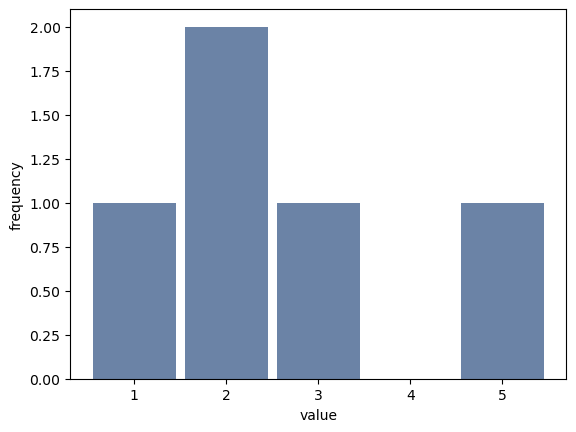

In [38]:
#Config takes parameters that label the x and y axes, among other things.

import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

In [39]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [40]:
import nsfg

In [41]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

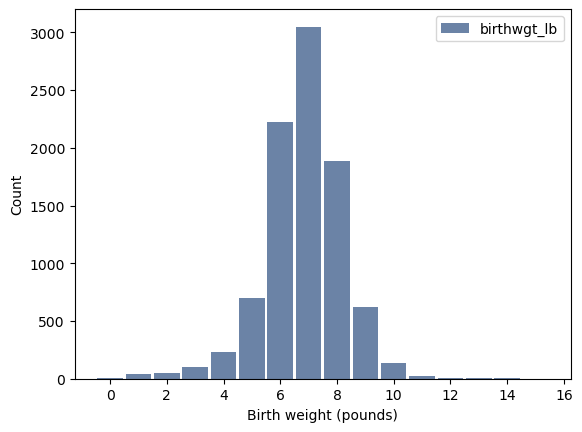

In [44]:
#Here's the histogram of birth weights in pounds.

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

In [45]:
ages = np.floor(live.agepreg)

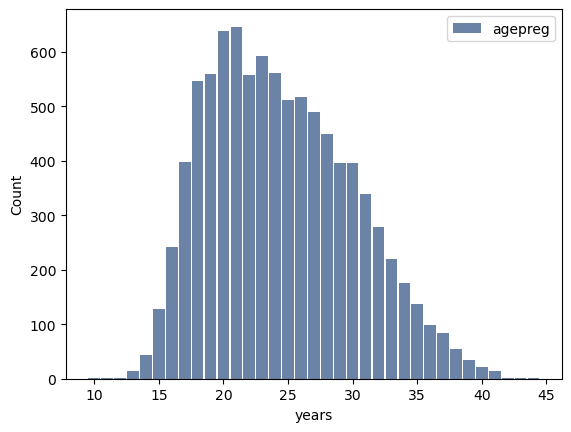

In [46]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

In [48]:
#Hist provides smallest, which select the lowest values and their frequencies.

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


In [50]:
#From live births, we can select first babies and others using birthord, then compute histograms of pregnancy length for the two groups.

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

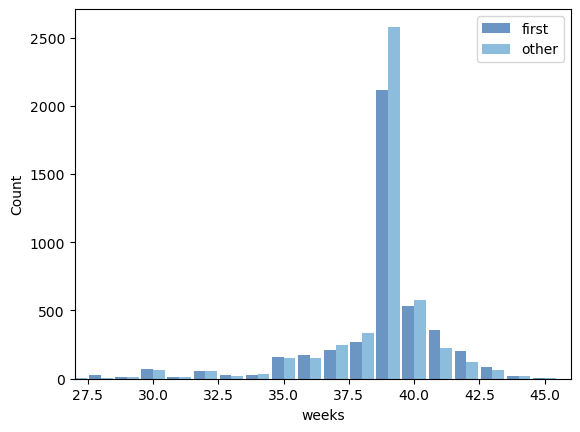

In [51]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [52]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [54]:
#Here are the mean and standard deviation:

mean, std

(38.56055968517709, 2.702343810070593)

In [55]:
#Here's are the mean pregnancy lengths for first babies and others:

firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [56]:
#And here's the difference (in weeks):

firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

mean
firsts: 7.201094430437772
others: 7.325855614973262

stdev
firsts: 7.201094430437772
others: 7.325855614973262

median
firsts: 7.3125
others: 7.375


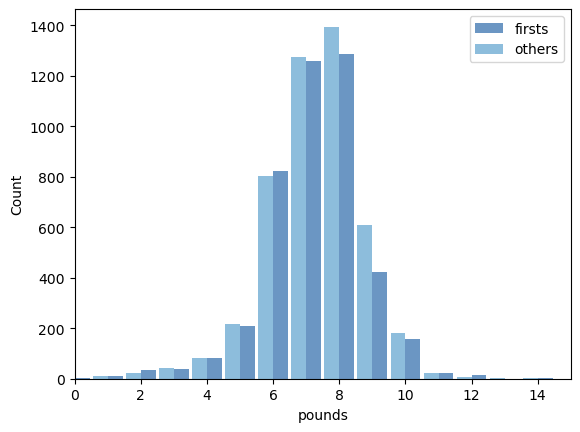

In [59]:
firsts_hist=thinkstats2.Hist(np.round(firsts.totalwgt_lb), label='firsts')
others_hist=thinkstats2.Hist(np.round(others.totalwgt_lb), label='others')

print('mean')
print('firsts:', firsts.totalwgt_lb.mean())
print('others:', others.totalwgt_lb.mean())
print('')
print('stdev')
print('firsts:', firsts.totalwgt_lb.mean())
print('others:', others.totalwgt_lb.mean())
print('')
print('median')
print('firsts:', firsts.totalwgt_lb.median())
print('others:', others.totalwgt_lb.median())

width=0.45
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_hist, align='left', width=width)
thinkplot.Hist(others_hist, align='right', width=width)
thinkplot.Config(xlabel='pounds', ylabel='Count', xlim=(0, 15))

In [73]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [63]:
#Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.

#Here we will load respondent file.

resp = nsfg.ReadFemResp()


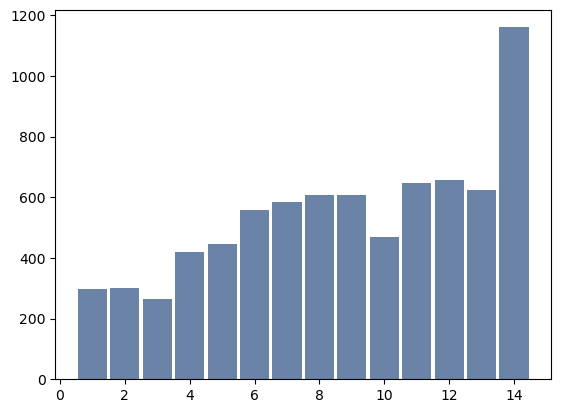

In [64]:
#Make a histogram of totincr the total income for the respondent's family.

inc_hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(inc_hist)

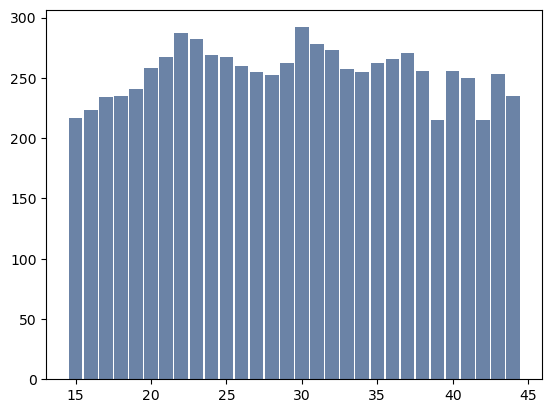

In [65]:
#Make a histogram ofage_r, the respondent's age at the time of interview.

age_hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(age_hist)

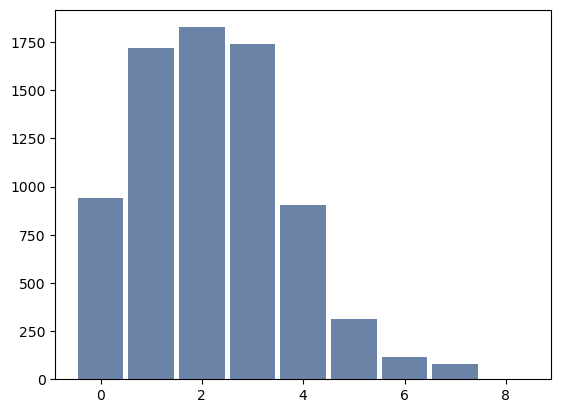

In [66]:
#Make a histogram of numfmhh, the number of people in the respondent's household


fmhh_hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(fmhh_hist)


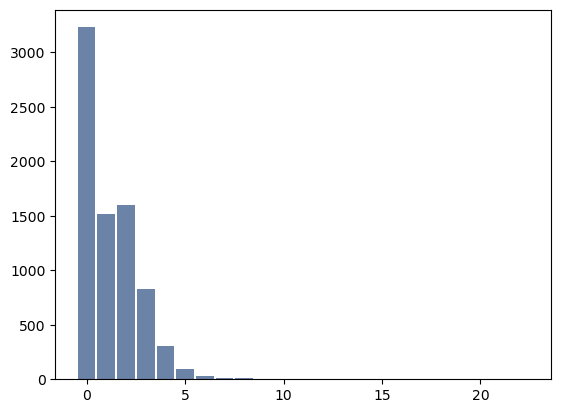

In [67]:
#Make a histogram of parity, the number of children borne by the respondent. How would you describe this distribution?

parity_hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(parity_hist)

In [68]:
#Use Hist.Largest to find the largest values of parity.

parity_hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

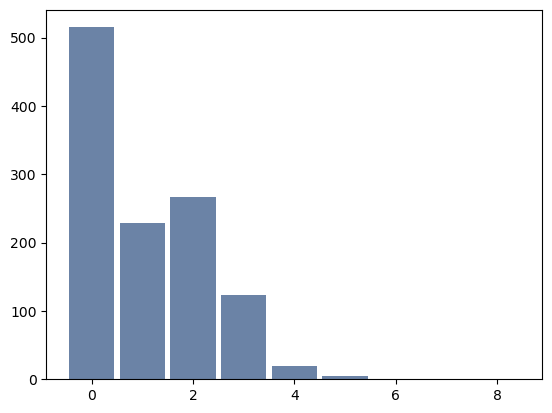

In [69]:
#Use totincr to select the respondents with the highest income (level 14). Plot the histogram of parity for just the high income respondents.

hinc = resp[resp['totincr'] == 14]
other = resp[resp['totincr'] < 14]
hinc_hist = thinkstats2.Hist(hinc.parity)
thinkplot.Hist(hinc_hist)

In [70]:
#Find the largest parities for high income respondents.

hinc_hist.Largest(5)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]

In [71]:
#Compare the mean parity for high income respondents and others.

print('mean parity, high income:', hinc.parity.mean())
print('mean parity, other:', other.parity.mean())

mean parity, high income: 1.0758620689655172
mean parity, other: 1.2495758136665125


In [74]:
#Compute the Cohen effect size for this difference. 

CohenEffectSize(hinc.parity, other.parity)

-0.1251185531466061

In [ ]:
#How does it compare with the difference in pregnancy length for first babies and others?

#Answer : The Cohen Effect Size for the difference in parity between mothers with high income and mothers with low income is much larger than the Cohen Effect Size for the difference in pregnancy length for first babies and others. 
#It is also negative, suggesting that, if anything, mothers with high incomes tend to have fewer children.